# Структурное разрушение

Предельная загрузка - 10
Текущая загрузка - [5-9]

Критерий полного разрушения ${\sigma}_{1}$ - все элементы системы вышли из строя

Критерий связности ${\sigma}_{2}$ - нарушена связность структуры вершины

Показать за какое кол-во итераций каждый из критериев достигается

Вход: 50 вершин, 70 ребер

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
V = 50
E = 70

max_load = 10
mix_range_load = 5
max_range_load = 9

In [3]:
def get_labels(G):
    values = []
    for i in G.nodes:
        values.append(f'{i} {[dict(G.nodes.data())[i]["load"]]}')
    labels = dict(zip(list(dict(G.nodes.data()).keys()),values))
    return labels

In [4]:
def draw_graph(G, nodes_):
    plt.figure(figsize = (16, 12))
    labels = get_labels(G)
    pos = nx.spring_layout(G)
    if type(nodes_) is int:
        color_map = ['#FFF07C' if node == nodes_ else '#F0F7EE' 
                     for node in G.nodes]  
    else:
        color_map = ['#A9DBB8' if node in nodes_ else '#F0F7EE' 
                     for node in G.nodes]  
    nx.draw_networkx(G, pos, with_labels=True,labels = labels, 
                     node_color=color_map, node_size = 600)
    plt.show()

In [5]:
G = nx.gnm_random_graph(V, E)
for isolate in list(nx.isolates(G)):
    if isolate != V-1:
        G.add_edge(isolate, isolate + 1)
    else:
        G.add_edge(isolate, isolate - 1)
    
G_nodes = list(G.nodes())

for node in G_nodes:
    G.nodes[node]['load'] = random.randint(mix_range_load, max_range_load)

In [6]:
# выбирается начальная точка
start_node = int(random.choice(list(G.nodes)))
G.nodes[start_node]['load'] = max_load

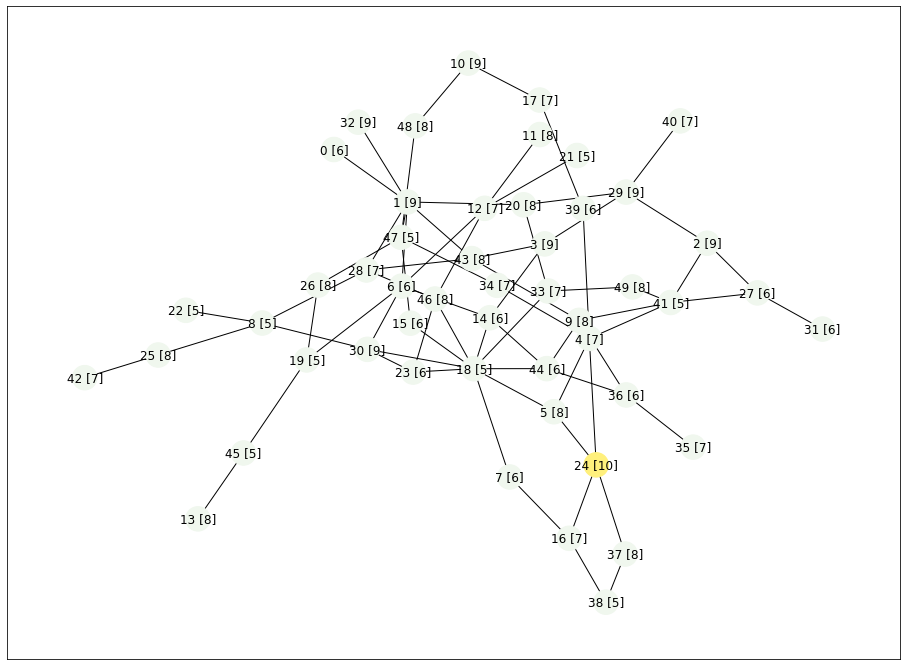

In [7]:
draw_graph(G, start_node)

In [8]:
def changing_load(start_node):
    print('\nВершина -> ', start_node)
    neighbor_list = []
    if G.has_node(start_node) and G.nodes[start_node]['load'] >= max_load:
        neighbor_list = list(G.neighbors(start_node))
        size = len(neighbor_list)
        if size:
            load = round(G.nodes[start_node]['load'] / size)
            for neighbor in neighbor_list[:-1]:
                print(f"\t({neighbor}) {G.nodes[neighbor]['load']} -> {G.nodes[neighbor]['load'] + load}")
                G.nodes[neighbor]['load'] += load
            if size % 2 != 0:
                print(f"\t({neighbor_list[-1]}) {G.nodes[neighbor_list[-1]]['load']} -> {G.nodes[neighbor_list[-1]]['load'] + load + 1}")
                G.nodes[neighbor_list[-1]]['load'] += load + 1
            else:
                print(f"\t({neighbor_list[-1]}) {G.nodes[neighbor_list[-1]]['load']} -> {G.nodes[neighbor_list[-1]]['load'] + load}")
                G.nodes[neighbor_list[-1]]['load'] += load
        else:
            print('\tСтеперь вершины - 0')
        G.remove_node(start_node)
        print(f'\tВершина {start_node} удалена')
    else:
        print('нагрузка меньше 10 или не существует')
    return neighbor_list

In [9]:
print(f"Вершина ({start_node}) - нагрузка [{G.nodes[start_node]['load']}]\n")

Вершина (24) - нагрузка [10]



**********
Итерация 0
**********

Вершина ->  24
	(4) 7 -> 9
	(16) 7 -> 9
	(5) 8 -> 10
	(37) 8 -> 10
	Вершина 24 удалена


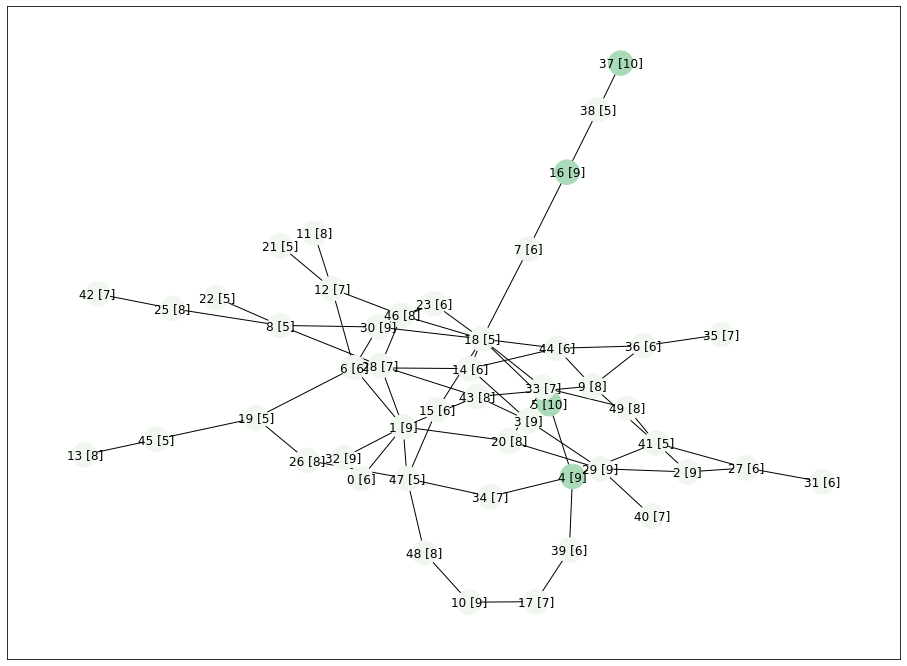

In [10]:
print('**********\nИтерация 0\n**********')
neighbor_list = changing_load(start_node)
draw_graph(G, neighbor_list)

In [11]:
def iterations(neighbor_list):
    print('работаем с ', neighbor_list)
    all_neighbor_list = []

    for idx, node in enumerate(neighbor_list):
        all_neighbor_list += changing_load(node)
    
    draw_graph(G, all_neighbor_list)
    return all_neighbor_list

In [12]:
neighbor_list

[4, 16, 5, 37]

Итерация  1 
**********

работаем с  [4, 16, 5, 37]

Вершина ->  4
нагрузка меньше 10 или не существует

Вершина ->  16
нагрузка меньше 10 или не существует

Вершина ->  5
	(4) 9 -> 14
	(18) 5 -> 10
	Вершина 5 удалена

Вершина ->  37
	(38) 5 -> 16
	Вершина 37 удалена


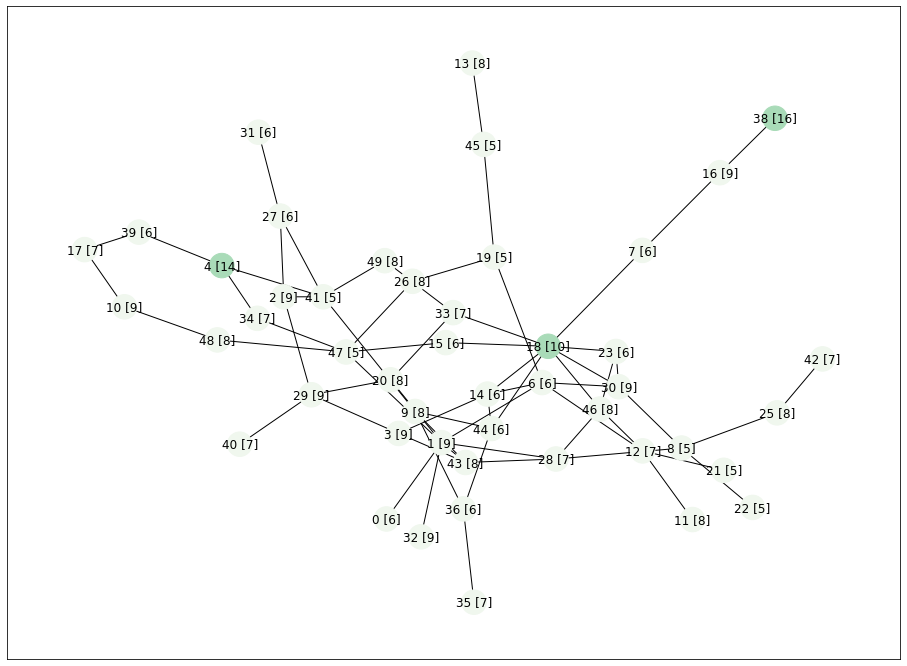


Итерация  2 
**********

работаем с  [4, 18, 38]

Вершина ->  4
	(34) 7 -> 12
	(39) 6 -> 11
	(41) 5 -> 11
	Вершина 4 удалена

Вершина ->  18
	(46) 8 -> 9
	(30) 9 -> 10
	(23) 6 -> 7
	(33) 7 -> 8
	(14) 6 -> 7
	(44) 6 -> 7
	(7) 6 -> 7
	(15) 6 -> 7
	Вершина 18 удалена

Вершина ->  38
	(16) 9 -> 26
	Вершина 38 удалена


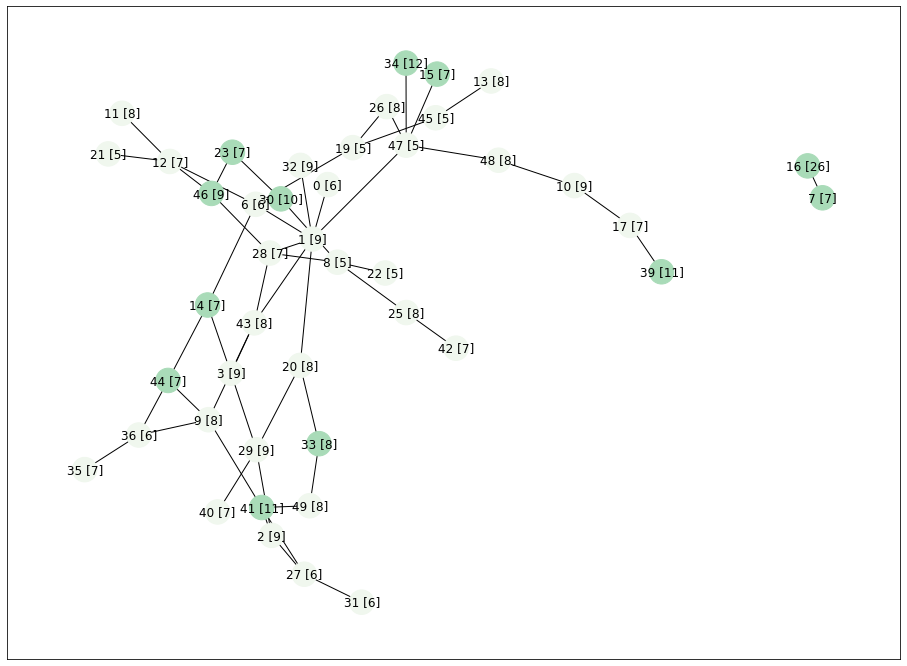


Итерация  3 
**********



------------------------
НАРУШЕНА СВЯЗНОСТЬ ГРАФА
------------------------


работаем с  [34, 39, 41, 46, 30, 23, 33, 14, 44, 7, 15, 16]

Вершина ->  34
	(47) 5 -> 18
	Вершина 34 удалена

Вершина ->  39
	(17) 7 -> 19
	Вершина 39 удалена

Вершина ->  41
	(27) 6 -> 9
	(9) 8 -> 11
	(49) 8 -> 11
	(2) 9 -> 12
	Вершина 41 удалена

Вершина ->  46
нагрузка меньше 10 или не существует

Вершина ->  30
	(6) 6 -> 9
	(23) 7 -> 10
	(8) 5 -> 9
	Вершина 30 удалена

Вершина ->  23
	(46) 9 -> 20
	Вершина 23 удалена

Вершина ->  33
нагрузка меньше 10 или не существует

Вершина ->  14
нагрузка меньше 10 или не существует

Вершина ->  44
нагрузка меньше 10 или не существует

Вершина ->  7
нагрузка меньше 10 или не существует

Вершина ->  15
нагрузка меньше 10 или не существует

Вершина ->  16
	(7) 7 -> 34
	Вершина 16 удалена


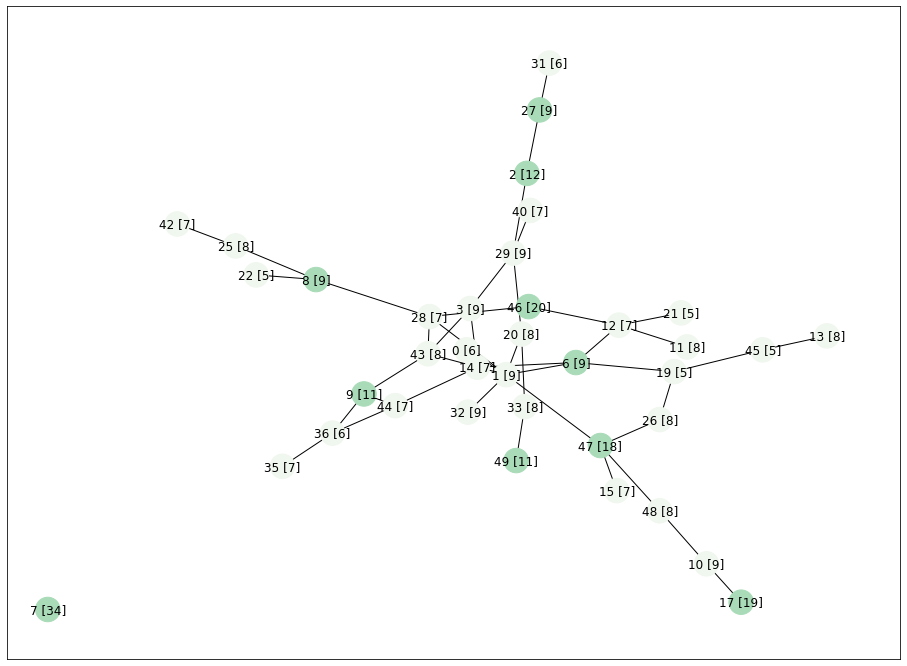


Итерация  4 
**********



------------------------
НАРУШЕНА СВЯЗНОСТЬ ГРАФА
------------------------


работаем с  [47, 17, 27, 9, 49, 2, 6, 23, 8, 46, 7]

Вершина ->  47
	(48) 8 -> 12
	(15) 7 -> 11
	(1) 9 -> 13
	(26) 8 -> 12
	Вершина 47 удалена

Вершина ->  17
	(10) 9 -> 29
	Вершина 17 удалена

Вершина ->  27
нагрузка меньше 10 или не существует

Вершина ->  9
	(44) 7 -> 11
	(43) 8 -> 12
	(36) 6 -> 11
	Вершина 9 удалена

Вершина ->  49
	(33) 8 -> 20
	Вершина 49 удалена

Вершина ->  2
	(27) 9 -> 15
	(29) 9 -> 15
	Вершина 2 удалена

Вершина ->  6
нагрузка меньше 10 или не существует

Вершина ->  23
нагрузка меньше 10 или не существует

Вершина ->  8
нагрузка меньше 10 или не существует

Вершина ->  46
	(12) 7 -> 17
	(28) 7 -> 17
	Вершина 46 удалена

Вершина ->  7
	Степерь вершины - 0
	Вершина 7 удалена


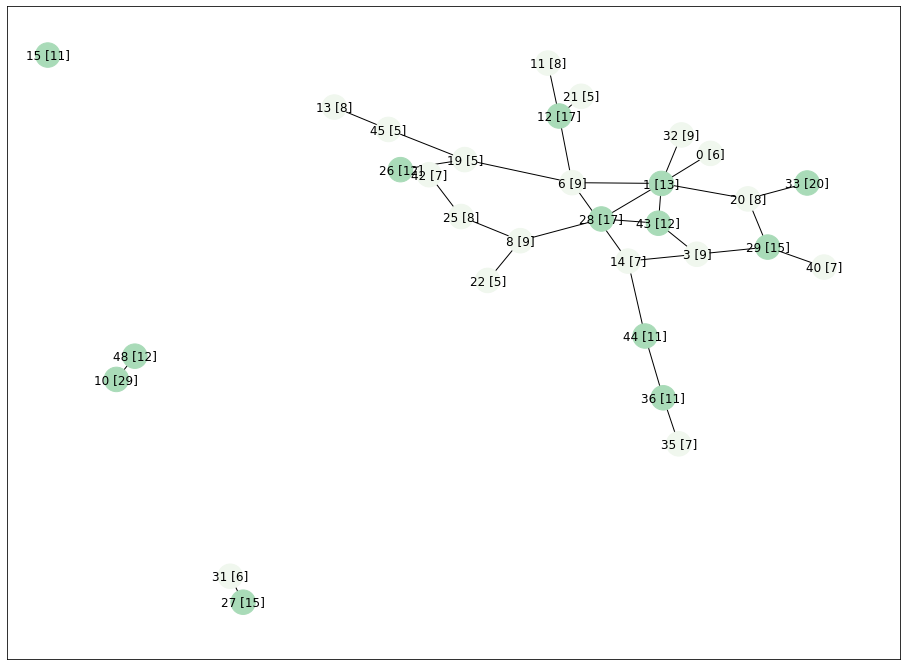


Итерация  5 
**********



------------------------
НАРУШЕНА СВЯЗНОСТЬ ГРАФА
------------------------


работаем с  [48, 15, 1, 26, 10, 44, 43, 36, 33, 27, 29, 12, 28]

Вершина ->  48
	(10) 29 -> 42
	Вершина 48 удалена

Вершина ->  15
	Степерь вершины - 0
	Вершина 15 удалена

Вершина ->  1
	(28) 17 -> 19
	(20) 8 -> 10
	(43) 12 -> 14
	(32) 9 -> 11
	(6) 9 -> 11
	(0) 6 -> 8
	Вершина 1 удалена

Вершина ->  26
	(19) 5 -> 18
	Вершина 26 удалена

Вершина ->  10
	Степерь вершины - 0
	Вершина 10 удалена

Вершина ->  44
	(36) 11 -> 17
	(14) 7 -> 13
	Вершина 44 удалена

Вершина ->  43
	(28) 19 -> 26
	(3) 9 -> 16
	Вершина 43 удалена

Вершина ->  36
	(35) 7 -> 25
	Вершина 36 удалена

Вершина ->  33
	(20) 10 -> 31
	Вершина 33 удалена

Вершина ->  27
	(31) 6 -> 22
	Вершина 27 удалена

Вершина ->  29
	(20) 31 -> 36
	(40) 7 -> 12
	(3) 16 -> 22
	Вершина 29 удалена

Вершина ->  12
	(6) 11 -> 17
	(21) 5 -> 11
	(11) 8 -> 15
	Вершина 12 удалена

Вершина ->  28
	(8) 9 -> 36
	Вершина 28 удалена


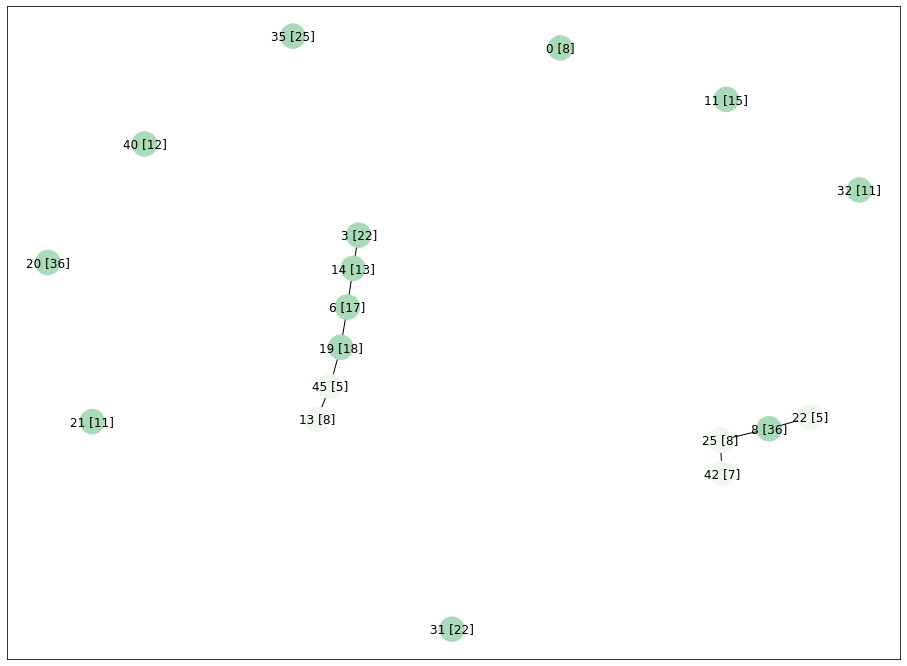


Итерация  6 
**********



------------------------
НАРУШЕНА СВЯЗНОСТЬ ГРАФА
------------------------


работаем с  [10, 28, 20, 43, 32, 6, 0, 19, 36, 14, 28, 3, 35, 20, 31, 20, 40, 3, 6, 21, 11, 8]

Вершина ->  10
нагрузка меньше 10 или не существует

Вершина ->  28
нагрузка меньше 10 или не существует

Вершина ->  20
	Степерь вершины - 0
	Вершина 20 удалена

Вершина ->  43
нагрузка меньше 10 или не существует

Вершина ->  32
	Степерь вершины - 0
	Вершина 32 удалена

Вершина ->  6
	(19) 18 -> 26
	(14) 13 -> 21
	Вершина 6 удалена

Вершина ->  0
нагрузка меньше 10 или не существует

Вершина ->  19
	(45) 5 -> 32
	Вершина 19 удалена

Вершина ->  36
нагрузка меньше 10 или не существует

Вершина ->  14
	(3) 22 -> 44
	Вершина 14 удалена

Вершина ->  28
нагрузка меньше 10 или не существует

Вершина ->  3
	Степерь вершины - 0
	Вершина 3 удалена

Вершина ->  35
	Степерь вершины - 0
	Вершина 35 удалена

Вершина ->  20
нагрузка меньше 10 или не существует

Вершина ->  31
	Степерь вершины - 0
	Ве

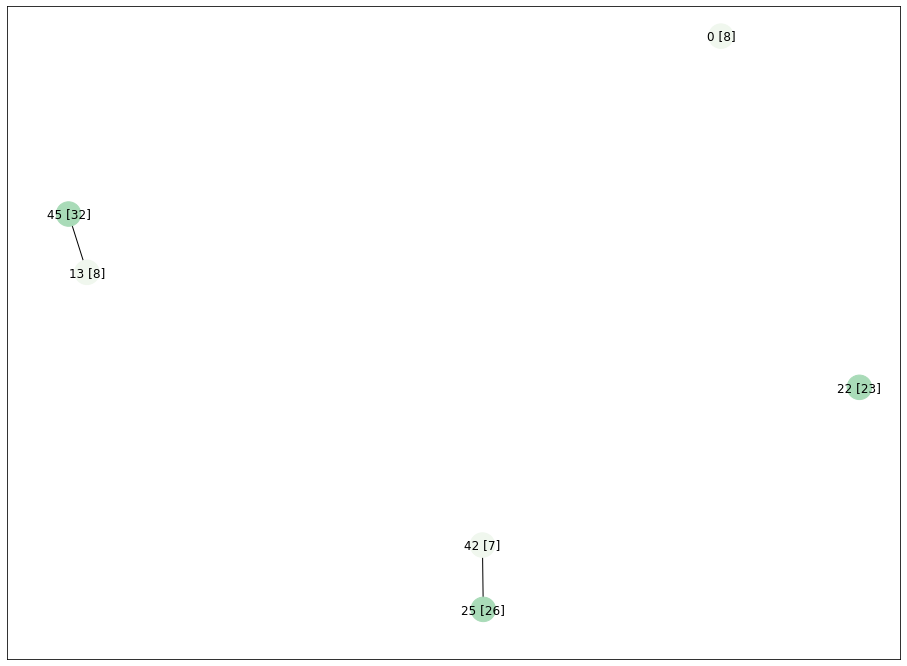


Итерация  7 
**********



------------------------
НАРУШЕНА СВЯЗНОСТЬ ГРАФА
------------------------


работаем с  [19, 14, 45, 3, 25, 22]

Вершина ->  19
нагрузка меньше 10 или не существует

Вершина ->  14
нагрузка меньше 10 или не существует

Вершина ->  45
	(13) 8 -> 41
	Вершина 45 удалена

Вершина ->  3
нагрузка меньше 10 или не существует

Вершина ->  25
	(42) 7 -> 34
	Вершина 25 удалена

Вершина ->  22
	Степерь вершины - 0
	Вершина 22 удалена


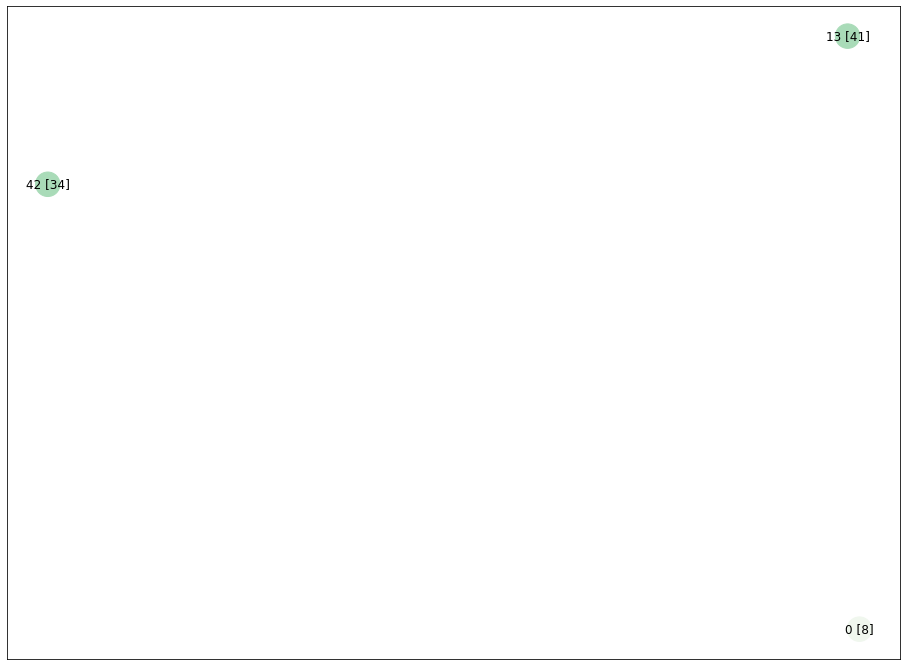


Итерация  8 
**********



-----------------------
ГРАФ ПОЛНОСТЬЮ РАЗРУШЕН
-----------------------




In [13]:
sigma1 = 0
sigma2 = 0

for iterr in range(1, 50):
    print('Итерация ', iterr, '\n**********\n')
    if not neighbor_list:
        # выбирается начальная точка
        start_node = int(random.choice(list(G.nodes)))
        G.nodes[start_node]['load'] = max_load
        print('\nВыбрана новая начальная точка\n')
        print(f"Вершина ({start_node}) - нагрузка [{G.nodes[start_node]['load']}]\n")
        draw_graph(G, start_node)
        
        neighbor_list = changing_load(start_node)
        
    if nx.is_empty(G):
        print('\n\n-----------------------\nГРАФ ПОЛНОСТЬЮ РАЗРУШЕН\n-----------------------\n\n')
        sigma1 = iterr
        break
    if not nx.is_connected(G):
        print('\n\n------------------------\nНАРУШЕНА СВЯЗНОСТЬ ГРАФА\n------------------------\n\n')
        sigma2 = iterr
    result_neighbor_list = iterations(neighbor_list)
    neighbor_list = result_neighbor_list.copy()   
    print()